## Household electric power consumption dataset. This is time series dataset and it's intendeted to be used for regression modeling to predict Global_active_power value based on historical data. You should do the following:

### download the dataset (train and test files)

In [1]:
from pathlib import Path
import multiprocessing
import tqdm
import requests
import pandas as pd
import pandas_profiling
import seaborn as sns
import pandas_profiling
import numpy as np

In [4]:
data_path = Path('') / 'data'
data_path.mkdir(exist_ok=True)

dataset_url = 'http://ps2.railsreactor.net/datasets/power_consumption/household_power_consumption.csv'
file_content = requests.get(dataset_url).text
with open(data_path / 'household_power_consumption.csv', 'w+', encoding='utf-8') as output_file:
    output_file.write(file_content)

### load the dataset via pandas

In [2]:
df = pd.read_csv(
    './data/household_power_consumption.csv',
    low_memory=False,
    parse_dates = {'datetime':['Date', 'Time'], 'date': ['Date'], 'time': ['Time']},
    index_col = ['datetime'],
    na_values=['nan', '?'],
    infer_datetime_format=True
)

### print the dataset size and first rows from the dataset

In [3]:
print(f'dataset size is {df.shape[0]}')
df.head()

dataset size is 2075259


,date,time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
datetime,,,,,,,,,
2006-12-16 17:24:00,2006-12-16,2019-07-27 17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0
2006-12-16 17:25:00,2006-12-16,2019-07-27 17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0
2006-12-16 17:26:00,2006-12-16,2019-07-27 17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0
2006-12-16 17:27:00,2006-12-16,2019-07-27 17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0
2006-12-16 17:28:00,2006-12-16,2019-07-27 17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2075259 entries, 2006-12-16 17:24:00 to 2010-11-26 21:02:00
Data columns (total 9 columns):
date                     datetime64[ns]
time                     datetime64[ns]
Global_active_power      float64
Global_reactive_power    float64
Voltage                  float64
Global_intensity         float64
Sub_metering_1           float64
Sub_metering_2           float64
Sub_metering_3           float64
dtypes: datetime64[ns](2), float64(7)
memory usage: 158.3 MB


### print number of rows with missing values, analyze which columns have the biggest number of missing values

In [5]:
df.isnull().sum()

date                         0
time                         0
Global_active_power      25979
Global_reactive_power    25979
Voltage                  25979
Global_intensity         25979
Sub_metering_1           25979
Sub_metering_2           25979
Sub_metering_3           25979
dtype: int64

### analyze values distribution for each column (except Time and Date)

In [6]:
numeric_cols = [
    'Global_active_power',
    'Global_reactive_power',
    'Voltage',
    'Global_intensity',
    'Sub_metering_1',
    'Sub_metering_2',
    'Sub_metering_3',
]

In [7]:
df[numeric_cols].describe()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
count,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06
mean,1.091615e+00,1.237145e-01,2.408399e+02,4.627759e+00,1.121923e+00,1.298520e+00,6.458447e+00
std,1.057294e+00,1.127220e-01,3.239987e+00,4.444396e+00,6.153031e+00,5.822026e+00,8.437154e+00
min,7.600000e-02,0.000000e+00,2.232000e+02,2.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00
25%,3.080000e-01,4.800000e-02,2.389900e+02,1.400000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,6.020000e-01,1.000000e-01,2.410100e+02,2.600000e+00,0.000000e+00,0.000000e+00,1.000000e+00
75%,1.528000e+00,1.940000e-01,2.428900e+02,6.400000e+00,0.000000e+00,1.000000e+00,1.700000e+01
max,1.112200e+01,1.390000e+00,2.541500e+02,4.840000e+01,8.800000e+01,8.000000e+01,3.100000e+01


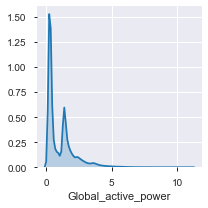

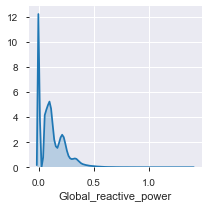

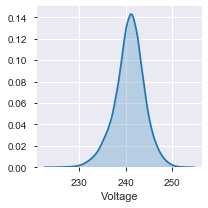

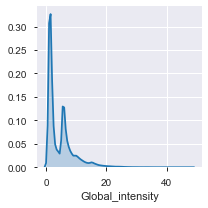

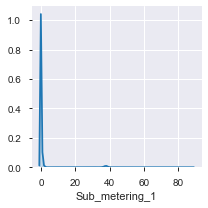

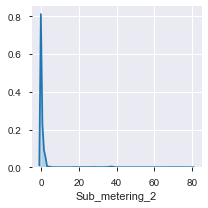

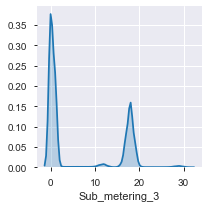

In [8]:
for col in numeric_cols:
    g = sns.FacetGrid(df)
    g.map(sns.kdeplot, col, shade=True)

### analyze the change in daily average Global_active_power. is there any seasonal behaviour? did consumption change with years?


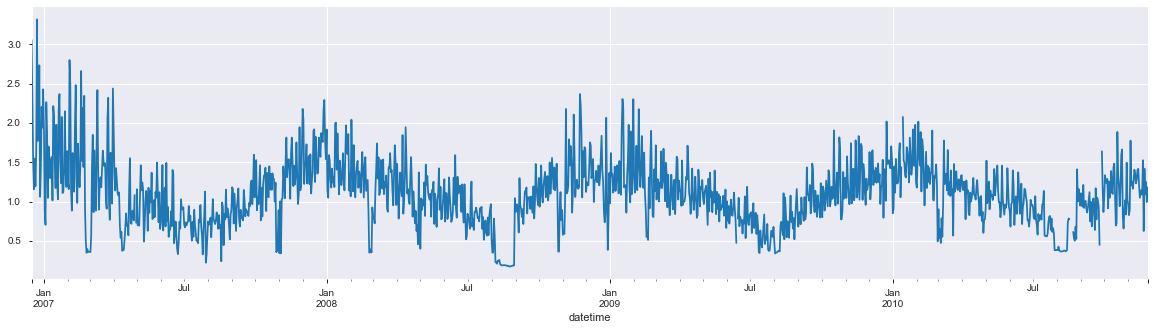

In [9]:
group_by_days = df.resample('D')
group_by_days['Global_active_power'].mean().plot(figsize=(20, 5));

Power consumption increases on winter due to use of heaters and shorter sunlight period.

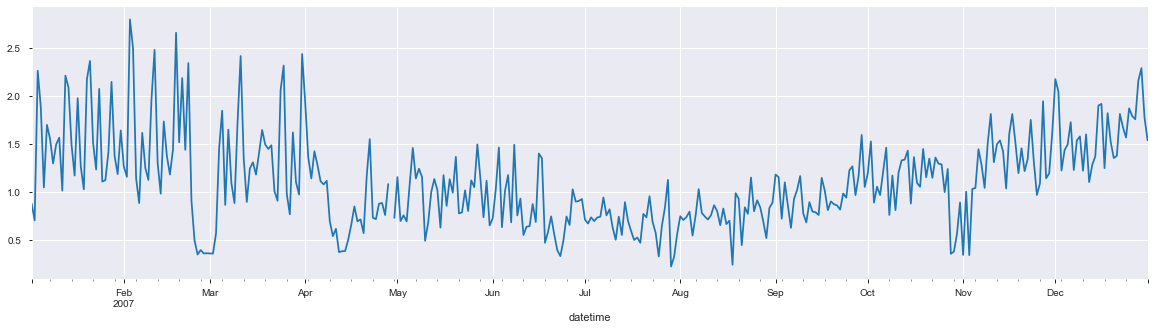

In [10]:
df['Global_active_power'].loc[(df.date > '2007-01-01') & (df.date <= '2007-12-31')].resample('D').mean().plot(figsize=(20, 5))

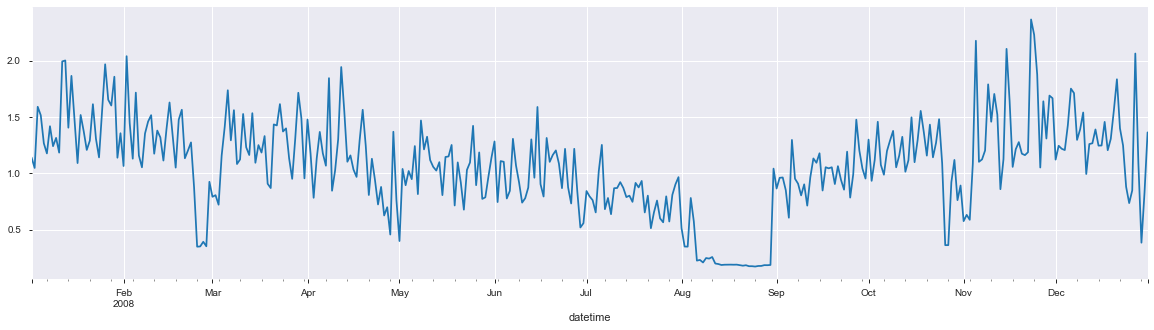

In [11]:
df['Global_active_power'].loc[(df.date > '2008-01-01') & (df.date <= '2008-12-31')].resample('D').mean().plot(figsize=(20, 5))

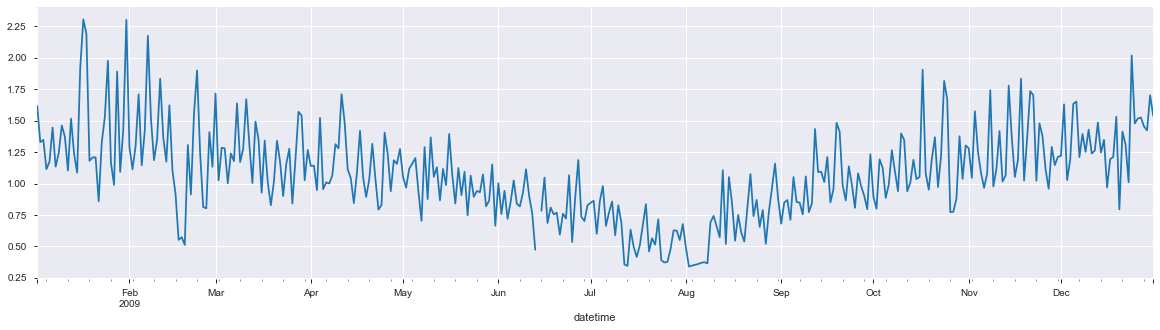

In [12]:
df['Global_active_power'].loc[(df.date > '2009-01-01') & (df.date <= '2009-12-31')].resample('D').mean().plot(figsize=(20, 5))

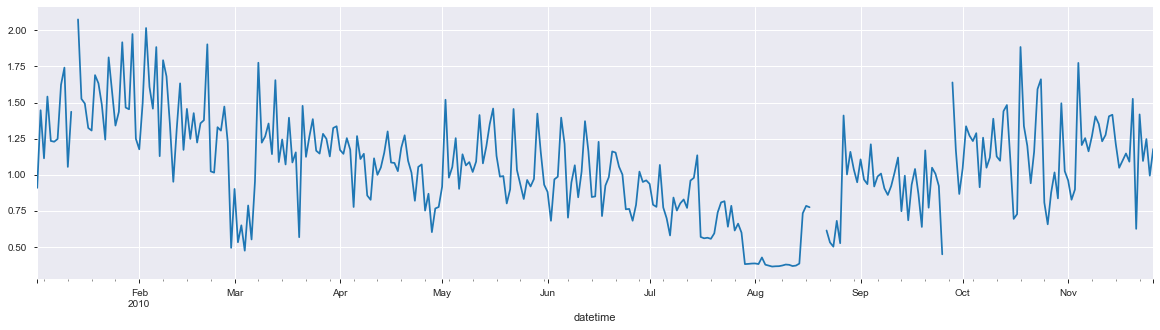

In [13]:
df['Global_active_power'].loc[(df.date > '2010-01-01') & (df.date <= '2010-12-31')].resample('D').mean().plot(figsize=(20, 5))

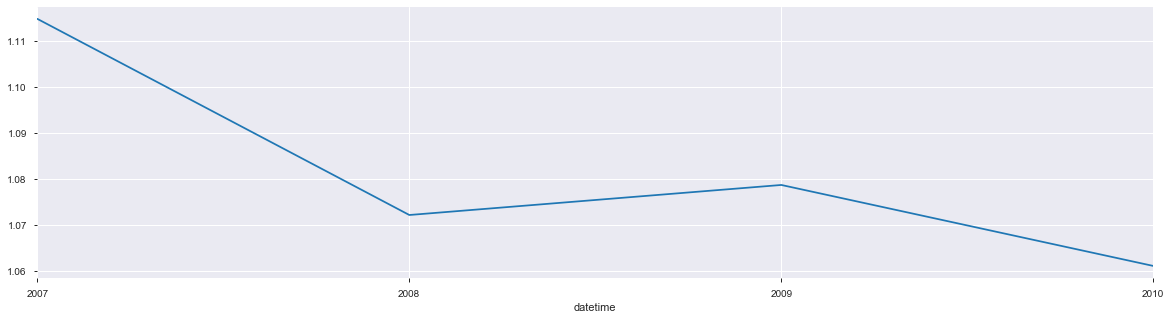

In [14]:
df['Global_active_power'].loc[(df.date > '2007-01-01') & (df.date <= '2010-12-31')].resample('Y').mean().plot(figsize=(20, 5))

Energy consumption is reducing by the years

### for 2 selected dates (2008-02-01 and 2008-02-02) plot the following variables with respect to time:

+ global active power
+ combined plot with measurements of 3 submeters
+ voltage
+ current intensity
+ active energy consumed every minute (in watt hour) not measured in sub-meterings 1, 2 and 3; this can be computed by the given formula:
global_active_power * 1000 / 60 - sub_metering_1 - sub_metering_2 - sub_metering_3

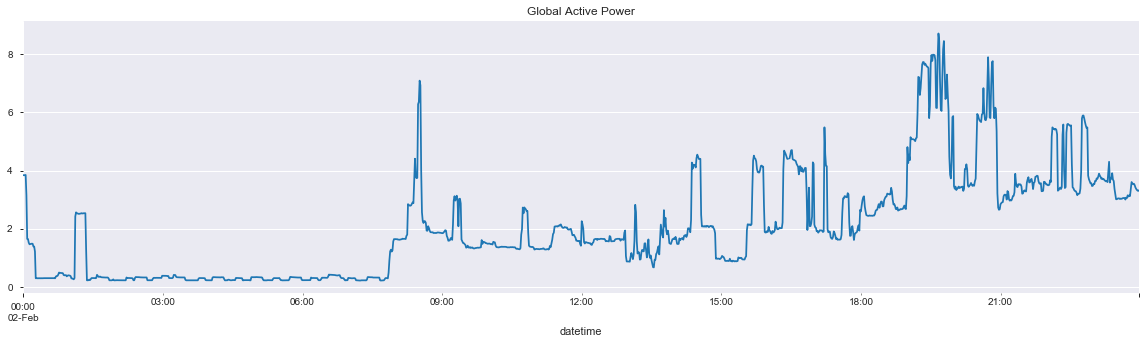

In [15]:
df['Global_active_power'].loc[(df.date > '2008-02-01') & (df.date <= '2008-02-02')].plot(figsize=(20, 5), title='Global Active Power')

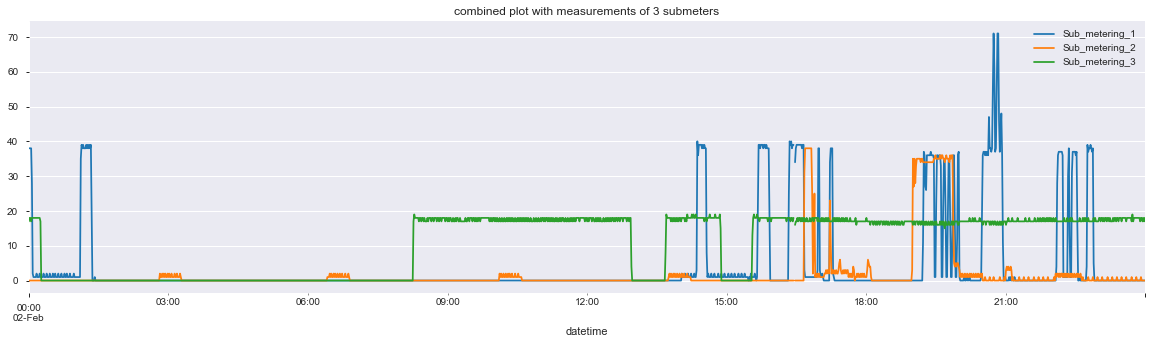

In [16]:
df[['Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3']].loc[(df.date > '2008-02-01') & (df.date <= '2008-02-02')].plot(figsize=(20, 5), title='combined plot with measurements of 3 submeters')

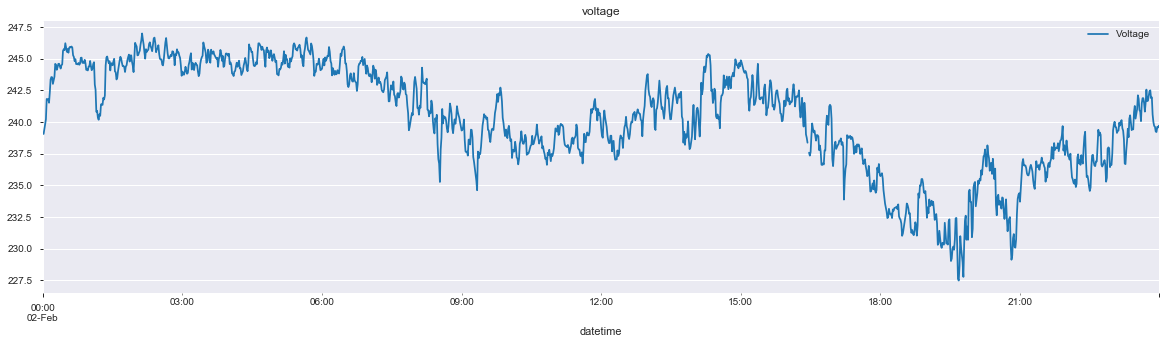

In [17]:
df[['Voltage']].loc[(df.date > '2008-02-01') & (df.date <= '2008-02-02')].plot(figsize=(20, 5), title='voltage')

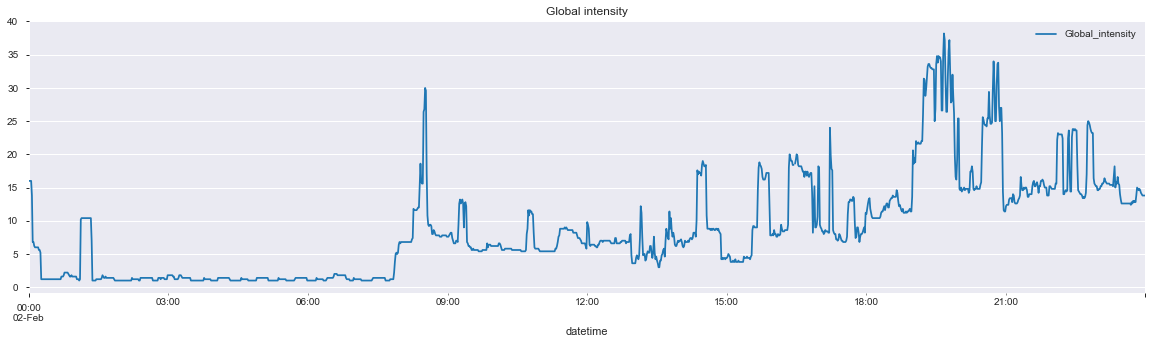

In [18]:
df[['Global_intensity']].loc[(df.date > '2008-02-01') & (df.date <= '2008-02-02')].plot(figsize=(20, 5), title='Global intensity')

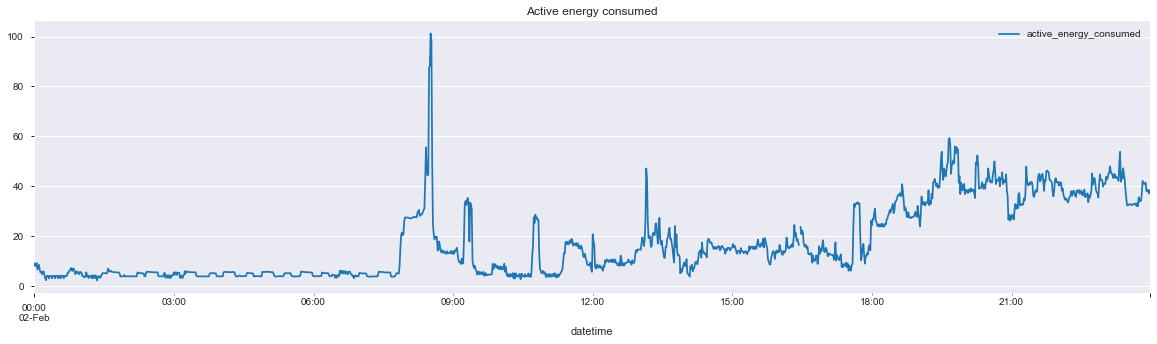

In [19]:
df['active_energy_consumed'] = df['Global_active_power'] * 1000 / 60 - df['Sub_metering_1'] - df['Sub_metering_2'] - df['Sub_metering_3']
df[['active_energy_consumed']].loc[(df.date > '2008-02-01') & (df.date <= '2008-02-02')].plot(figsize=(20, 5), title='Active energy consumed')

### detect dates with abnormal voltage or current if any

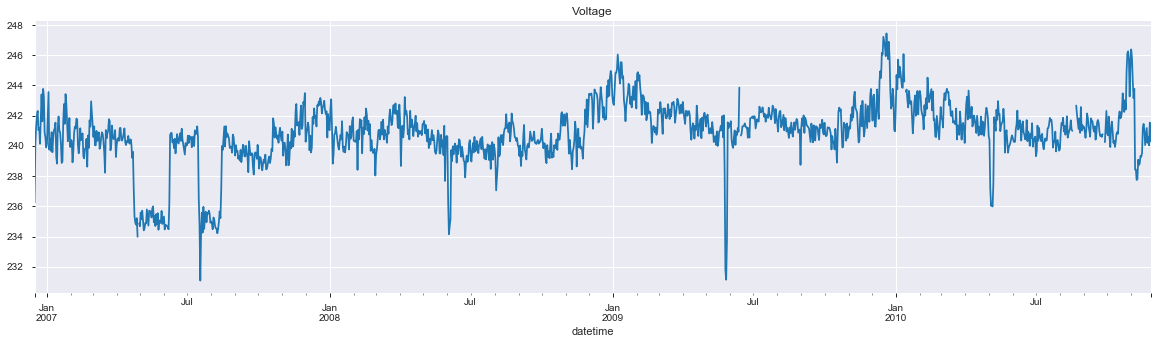

In [20]:
df['Voltage'].resample('D').mean().plot(figsize=(20, 5), title='Voltage')

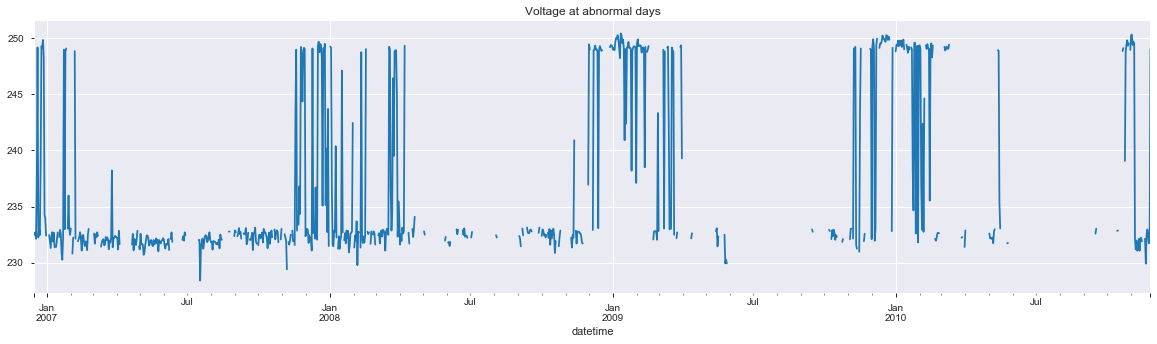

In [21]:
Q1 = np.nanpercentile(df['Voltage'], 25)
Q3 = np.nanpercentile(df['Voltage'], 75)
IQR = Q3 - Q1
outlier_step = 1.5 * IQR
outlier_indices = df[(df['Voltage'] < Q1 - outlier_step) | (df['Voltage'] > Q3 + outlier_step )].index

df['Voltage'].loc[outlier_indices].resample('D').mean().plot(figsize=(20, 5), title='Voltage at abnormal days')

There a lot of outliers - days with abnormal Voltage value. But I'd rather do not delete them all from consequent analysis as it possibly could be explained somehow. I'm not real electrician but people tend to use more electricity on winter season so in order to deliver needed Power (with constant Current value) Voltage should be increased. But there are also days with very low voltage consumption in the mid of summer that I couldn't explain but there also could exist some explanation.

### analyze correlation between columns

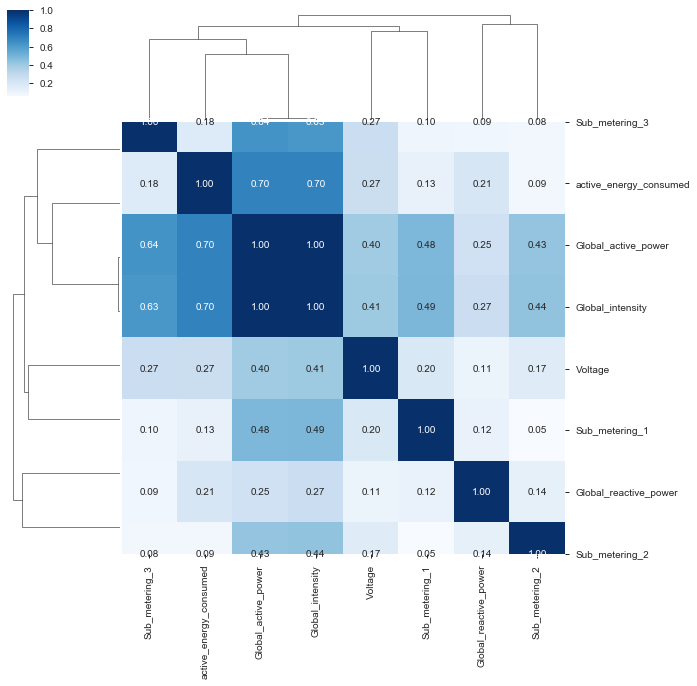

In [22]:
sns.clustermap(data = df.corr().abs(), annot=True, fmt = ".2f", cmap = 'Blues');

### perform preprocessing for the dataset by using any of the methods from lecture 4. the result of this step must be a dataset (X and y) that can be used for modelling

I would drop `Global_intensity` as it is almost duplicate of `Global_active_power`. Also we have created 'active_energy_consumed' feature which is based on `Global_active_power` - possibly it could also be excluded.

In [23]:
df.drop(['Global_intensity'], axis=1, inplace=True)

from sklearn.model_selection import train_test_split
train, test = train_test_split(df, test_size=0.2)

### generate automatic report for the dataset via pandas_profiling library

In [24]:
profile = pandas_profiling.ProfileReport(df=df)
profile.to_file(Path('') / 'power_profile.html')